In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmasher
from matplotlib.lines import Line2D
import numpy as np
import netCDF4 as nc
%matplotlib inline
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'Dejavu Serif'
plt.rcParams['font.size'] = 12

In [25]:
# constants
secondsPerDay = 86400
nx = 500
ny = 500
f0 = 1.4e-4
rhoConst = 1029

# plotting params
deepIndex = 30
ts = 60
xIndex = [300,100]
yMin = [270,50]
yMax = [307,480]
myCmap = cmasher.cm.waterlily

# io params
loc0 = f"/scratch/hcm7920/amb0/data/"
loc100 = f"/scratch/hcm7920/amb100/data/"
conc = ["0", "20", "40", "60", "80", "100"]
saveloc = "/home/hcm7920/experiments/arcticMiddepthBI/plots/"  

In [26]:
# load data

state = nc.Dataset(loc100+"state.nc")
depth = state["Z"][:deepIndex]

diagsSnapshots = nc.Dataset(loc100+"diagsSnapshots.nc")
vortSection1 = diagsSnapshots["momVort3"][ts,:deepIndex,yMin[0]:yMax[0],xIndex[0]]/f0
vortSection2 = diagsSnapshots["momVort3"][ts,:deepIndex,yMin[1]:yMax[1],xIndex[1]]/f0
rhoSection1 = diagsSnapshots["RHOAnoma"][ts,:deepIndex,yMin[0]:yMax[0]-1,xIndex[0]:xIndex[0]+2].mean((2,))
rhoSection2 = diagsSnapshots["RHOAnoma"][ts,:deepIndex,yMin[1]:yMax[1]-1,xIndex[1]:xIndex[1]+2].mean((2,))
rhoSection1 += rhoConst
rhoSection2 += rhoConst



In [27]:
# RHOAnoma adjusted to colocate with vorticity grid in x direction

In [28]:
myMin

1024.0

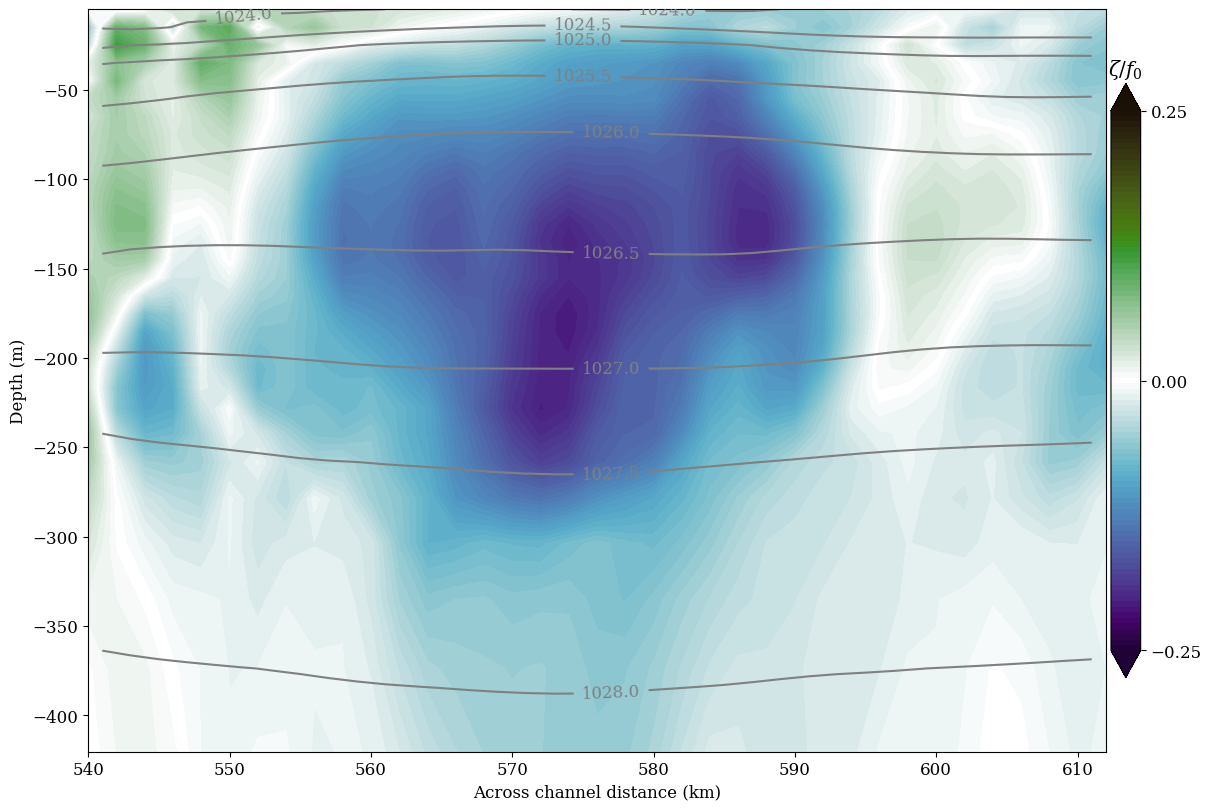

In [29]:
# plot salt section 1

myMax = rhoSection1.max().round(0)
myMin = rhoSection1.min().round(0)
myLevs = np.linspace(myMin,myMax,2*4+1)

myMax = abs(vortSection1).max()*1.2
myLevs1 = np.linspace(-myMax,myMax,100)

horizDistanceKm = diagsSnapshots["Y"][yMin[0]:yMax[0]-1]/1000
horizDistanceKmp1 = diagsSnapshots["Yp1"][yMin[0]:yMax[0]]/1000

plt.figure(layout="constrained",figsize=(12,8))

im1 = plt.contour(horizDistanceKm,depth,rhoSection1,myLevs,
                  colors="grey", linewidths=1.5)
plt.contourf(horizDistanceKmp1,depth,vortSection1,myLevs1,cmap=myCmap,extend="both")
plt.clabel(im1)
cbar = plt.colorbar(pad=0.005,shrink=0.8,ticks=[-0.25,0,0.25])
cbar.ax.set_title("$\zeta/f_0$")
plt.ylabel("Depth (m)")
plt.xlabel("Across channel distance (km)")

plt.savefig(saveloc+"officialFigs/figVortexSection.pdf",
           bbox_inches="tight")

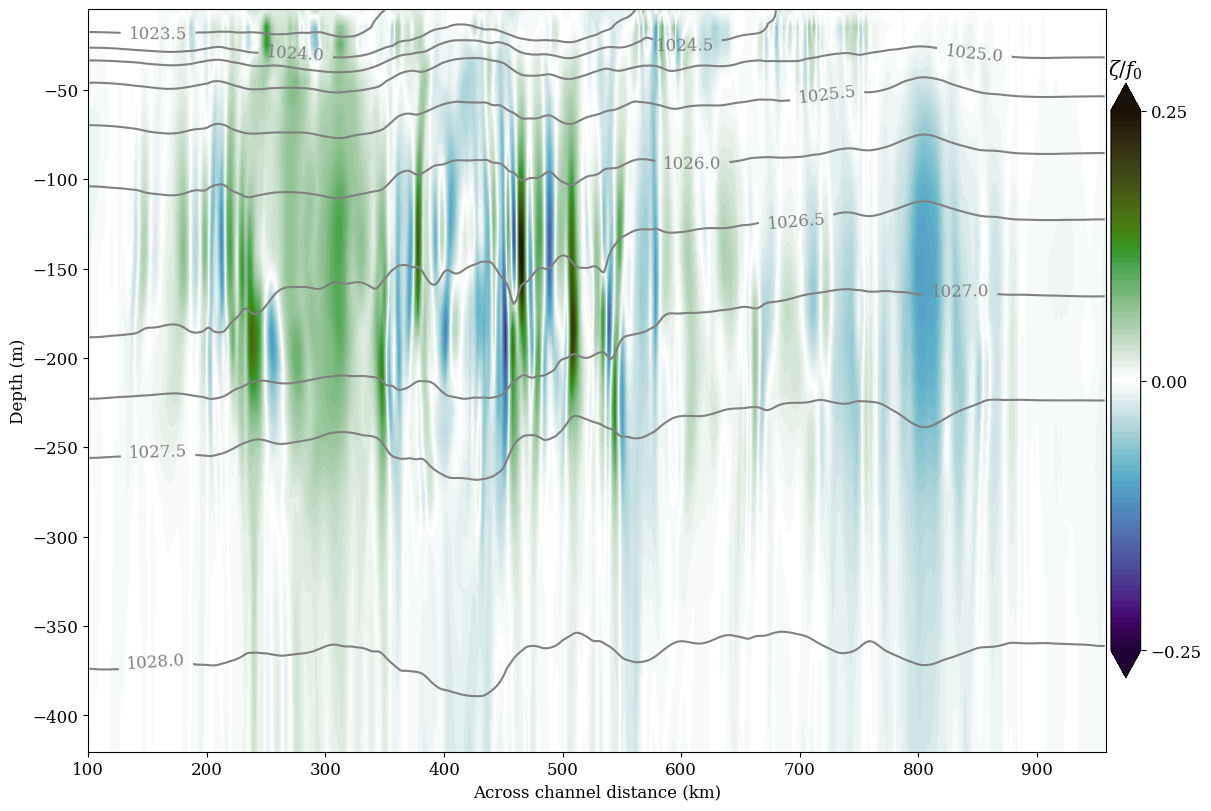

In [30]:
# plot salt section 2

myMax = rhoSection2.max().round(0)
myMin = rhoSection2.min().round(0)
myLevs = np.linspace(myMin,myMax,2*5+1)

myMax = abs(vortSection2).max()
myLevs1 = np.linspace(-myMax,myMax,100)

horizDistanceKm = diagsSnapshots["Y"][yMin[1]:yMax[1]-1]/1000
horizDistanceKmp1 = diagsSnapshots["Yp1"][yMin[1]:yMax[1]]/1000

plt.figure(layout="constrained",figsize=(12,8))

im1 = plt.contour(horizDistanceKm,depth,rhoSection2,myLevs,
                  colors="grey", linewidths=1.5)
plt.contourf(horizDistanceKmp1,depth,vortSection2,myLevs1,cmap=myCmap,extend="both")
plt.clabel(im1)
cbar = plt.colorbar(pad=0.005,shrink=0.8,ticks=[-0.25,0,0.25])
cbar.ax.set_title("$\zeta/f_0$")
plt.ylabel("Depth (m)")
plt.xlabel("Across channel distance (km)")
# plt.title(f"@ xIndex={xIndex[2]}, tStep={timestep[2]}")

plt.savefig(saveloc+"officialFigs/figVortexSectionBackup.pdf",
           bbox_inches="tight")